In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pickle


df = pd.read_csv('recruitment_data.csv')


df['EducationLevel'] = df['EducationLevel'].replace({1: 1, 2: 1})
df['InterviewScore'] = (df['InterviewScore'] / 20).round()
df['SkillScore'] = (df['SkillScore'] / 20).round()
df['PersonalityScore'] = (df['PersonalityScore'] / 20).round()



X = df[['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy']]
y = df['HiringDecision']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, rf_pred))
rf_cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion Matrix:")
print("Actual\\Predicted")
print("\t0\t1")
print(f"0\t{rf_cm[0, 0]}\t{rf_cm[0, 1]}")
print(f"1\t{rf_cm[1, 0]}\t{rf_cm[1, 1]}")


logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_accuracy:.4f}")
print(classification_report(y_test, logreg_pred))
logreg_cm = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Confusion Matrix:")
print("Actual\\Predicted")
print("\t0\t1")
print(f"0\t{logreg_cm[0, 0]}\t{logreg_cm[0, 1]}")
print(f"1\t{logreg_cm[1, 0]}\t{logreg_cm[1, 1]}")


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Metrics:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(classification_report(y_test, knn_pred))
knn_cm = confusion_matrix(y_test, knn_pred)
print("KNN Confusion Matrix:")
print("Actual\\Predicted")
print("\t0\t1")
print(f"0\t{knn_cm[0, 0]}\t{knn_cm[0, 1]}")
print(f"1\t{knn_cm[1, 0]}\t{knn_cm[1, 1]}")

with open('rf_model.pkl', 'wb') as rf_file:
    pickle.dump(rf_model, rf_file)

with open('logreg_model.pkl', 'wb') as logreg_file:
    pickle.dump(logreg_model, logreg_file)

with open('knn_model.pkl', 'wb') as knn_file:
    pickle.dump(knn_model, knn_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)


Random Forest Metrics:
Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       215
           1       0.89      0.87      0.88        85

    accuracy                           0.93       300
   macro avg       0.92      0.91      0.92       300
weighted avg       0.93      0.93      0.93       300

Random Forest Confusion Matrix:
Actual\Predicted
	0	1
0	206	9
1	11	74
Logistic Regression Metrics:
Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       215
           1       0.84      0.80      0.82        85

    accuracy                           0.90       300
   macro avg       0.88      0.87      0.88       300
weighted avg       0.90      0.90      0.90       300

Logistic Regression Confusion Matrix:
Actual\Predicted
	0	1
0	202	13
1	17	68
KNN Metrics:
Accuracy: 0.8500
              precision    recall  f1-score   support

           0       0.88     

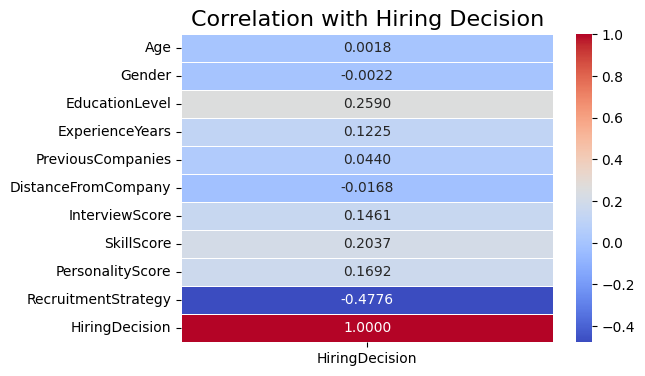


Number of rows where: Experience > (Age - 14): 148


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv('recruitment_data.csv')

df['EducationLevel'] = df['EducationLevel'].replace({1: 1, 2: 1, 3: 2, 4: 3})

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract only the correlations with 'HiringDecision'
hiring_decision_corr = correlation_matrix[['HiringDecision']]

# Create a heatmap to visualize the correlation with HiringDecision, with more decimals
plt.figure(figsize=(6, 4))
sns.heatmap(hiring_decision_corr, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)

# Set title and display the plot
plt.title('Correlation with Hiring Decision', fontsize=16)
plt.show()

# Count rows where experience is greater than viable (i.e., Age - 15)
df['ViableExperience'] = df['Age'] - 14
viable_experience_count = df[df['ExperienceYears'] > df['ViableExperience']].shape[0]

print(f"\nNumber of rows where: Experience > (Age - 14): {viable_experience_count}")


In [15]:
# Define the minimum age for each education level
education_age_requirements = {1: 21, 2: 22, 3: 24}

# Map the minimum required age based on EducationLevel
df['MinRequiredAge'] = df['EducationLevel'].map(education_age_requirements)

# Count rows where age is less than the minimum required age for the education level
impossible_education_age_count = df[df['Age'] < df['MinRequiredAge']].shape[0]

print(f"\nNumber of rows where Age is less than minimum time for education: {impossible_education_age_count}")



Number of rows where Age is less than minimum time for education: 78


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Load data
df = pd.read_csv('recruitment_data.csv')

# Data preprocessing
df['EducationLevel'] = df['EducationLevel'].replace({1: 1, 2: 1})
df['InterviewScore'] = (df['InterviewScore'] / 20).round()
df['SkillScore'] = (df['SkillScore'] / 20).round()
df['PersonalityScore'] = (df['PersonalityScore'] / 20).round()
#df = df.drop(columns=['RecruitmentStrategy'])

X = df[['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy']]
y = df['HiringDecision']

# Encode target variable
y = LabelEncoder().fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
y_true_classes = tf.argmax(y_test, axis=1).numpy()

accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Neural Network Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
nn_cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Neural Network Confusion Matrix:")
print("Actual\\Predicted")
print("\t0\t1")
print(f"0\t{nn_cm[0, 0]}\t{nn_cm[0, 1]}")
print(f"1\t{nn_cm[1, 0]}\t{nn_cm[1, 1]}")

Epoch 1/70


C:\Users\capnf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4715 - loss: 0.8137 - val_accuracy: 0.6792 - val_loss: 0.6143
Epoch 2/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7011 - loss: 0.6011 - val_accuracy: 0.6958 - val_loss: 0.5593
Epoch 3/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.5530 - val_accuracy: 0.7500 - val_loss: 0.5225
Epoch 4/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.5403 - val_accuracy: 0.7792 - val_loss: 0.4968
Epoch 5/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7720 - loss: 0.5307 - val_accuracy: 0.7958 - val_loss: 0.4752
Epoch 6/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7821 - loss: 0.5182 - val_accuracy: 0.8000 - val_loss: 0.4586
Epoch 7/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7660 - loss: 0.4931 - val_accuracy: 0.8042 - val_loss: 0.4494
Epoch 8/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8160 - loss: 0.4437 - val_accuracy: 0.8083 - val_loss: 0.4410
Epo